## This is the Feature Engineering to help optimize the prediction result

# 1. Retrospect and Overview
- Original data include 12 data sets:
    - train1, train2, train3, train4
    - test1, test2, test3, test
    - URL1, URL2, URL3, URL4
    - For time consideration, only chose 1 combination of data (train1, test1, RUL1) for study
- In 'IOT_1_Baseline_Data_Processing' phase:
    - Dropped last two columns, which are all n/a
    - Dropped feature sensor[1,5,6,10,16,18,19] since these data are all 0 value consistently
- Features used in baseline models are:
    - setting1 - setting 3
    - sensor[2,3,7,8,9,11,12,13,14,15,17,20,21]
- Add lables into data:
    - 'rul' as remaining useful life
    - 'w1' as weak warning (=1) when engine life remains <= 30 cycles
    - 'w2' as strong warning (=1) when life <= 30 cycles, and (=2) when life <= 15 cycles
- Objective for feature engineering:
    - Select the most important features to benefit model performance
    - Filter noise (rolling average)
    - Normalization
    - etc

# 2. Feature Engineering

### load Libraries

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()
%matplotlib inline
plt.style.use('ggplot')
from pandas.tools.plotting import scatter_matrix

### Prepare data

In [73]:
train1 = pd.read_pickle('data/train1.pkl')
test1 = pd.read_pickle('data/test1.pkl')
RUL1 = pd.read_pickle('data/RUL1.pkl')

In [74]:
train1[0:1]

,id,cycle,setting1,setting2,setting3,sensor2,sensor3,sensor4,sensor7,sensor8,...,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21,rul,w1,w2
0,1,1,-0.0007,-0.0004,100.0,641.82,1589.7,1400.6,554.36,2388.06,...,521.66,2388.02,8138.62,8.4195,392,39.06,23.419,191,0,0


In [75]:
test1[0:1]

,id,cycle,setting1,setting2,setting3,sensor2,sensor3,sensor4,sensor7,sensor8,...,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21,truth,rul,w1,w2
0,1,1,0.0023,0.0003,100.0,643.02,1585.29,1398.21,553.9,2388.04,...,2388.03,8125.55,8.4052,392,38.86,23.3735,112,142,0,0


In [76]:
RUL1[0:1]

,truth,id
0,112,1


## 2.A Correlations

In [77]:
# capture feature names as list

features = train1.columns[2:19].tolist()
print(features)

['setting1', 'setting2', 'setting3', 'sensor2', 'sensor3', 'sensor4', 'sensor7', 'sensor8', 'sensor9', 'sensor11', 'sensor12', 'sensor13', 'sensor14', 'sensor15', 'sensor17', 'sensor20', 'sensor21']


### Log Standard Diviation for Features

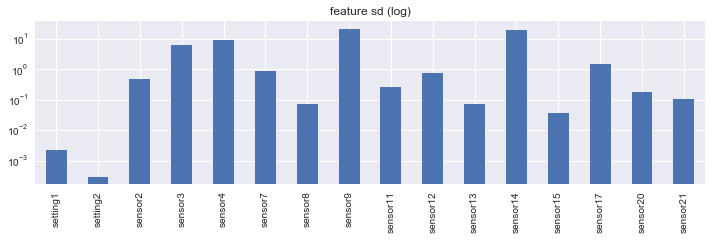

In [92]:
train1[features].std().plot(kind='bar', figsize=(12,3), logy=True, title='feature sd (log)')

### Features Correlation with Regression Label 'rul'

In [79]:
# setting3         NaN, means setting 3 has no value to regression, to drop

cor = train1[features].corrwith(train1.rul).sort_values(ascending=False)
print(cor)
features.remove('setting3')
cor_list = features+['rul']

sensor12    0.671983
sensor7     0.657223
sensor21    0.635662
sensor20    0.629428
setting2   -0.001948
setting1   -0.003198
sensor14   -0.306769
sensor9    -0.390102
sensor13   -0.562569
sensor8    -0.563968
sensor3    -0.584520
sensor17   -0.606154
sensor2    -0.606484
sensor15   -0.642667
sensor4    -0.678948
sensor11   -0.696228
setting3         NaN
dtype: float64


Feature 9 and 14 are strongly correlated (0.95)
Feature 9 only has strong correlation with 14, not with the rest


Text(0.5,1,'feature correlation heatmap')

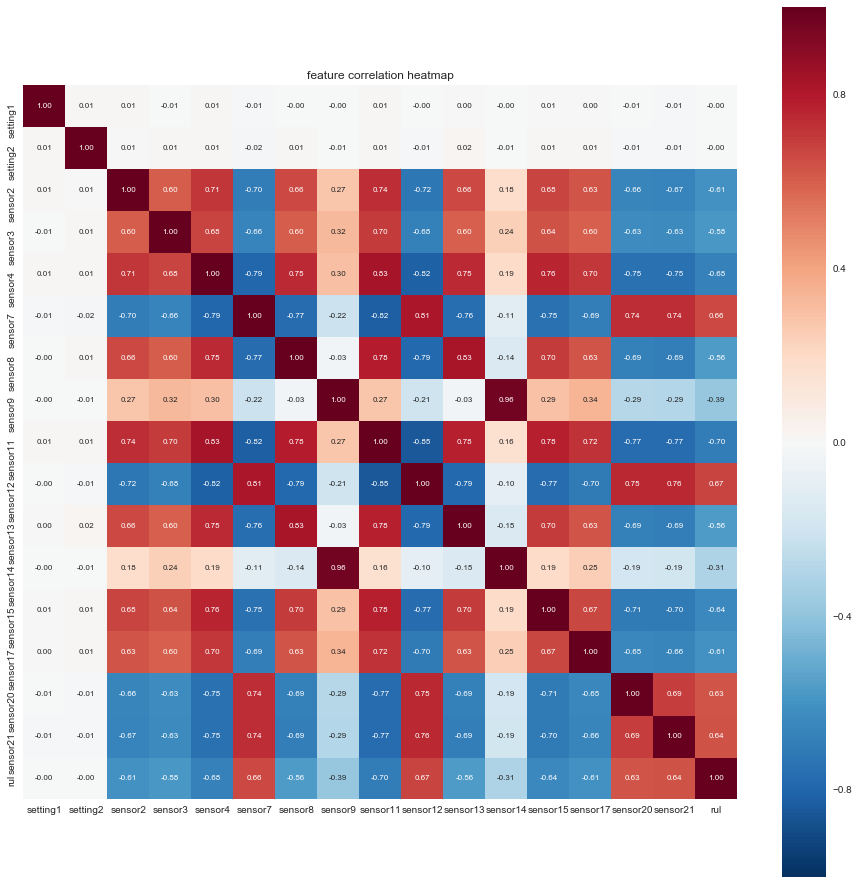

In [89]:
# Plot heatmap about correlations among features

cm = np.corrcoef(train1[cor_list].values.T)
fig = plt.figure(figsize=(16,16))
sns.set(font_scale=1.0)
print("Feature 9 and 14 are strongly correlated (0.95)")
print("Feature 9 only has strong correlation with 14, not with the rest")
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=cor_list, xticklabels=cor_list)
plt.title('feature correlation heatmap')